# Data Mining

## Lab 6: Dimensionality Reduction

Pada modul ini, Anda akan mempelajari tentang bagaimana kita dapat melakukan reduksi dimensi pada data dengan dimensi yang sangat besar, e.g. dari teks atau gambar. Dalam kasus ini, kita akan menggunakan dataset MNIST. Salah satu metode yang akan dibahas secara mendalam dalam modul ini adalah *Principal Component Analysis* (PCA).

In [1]:
from __future__ import print_function
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

np.random.seed(538)
plt.style.use('ggplot')

## Pengenalan PCA

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

mnist = load_digits()

img_rows, img_cols = 8, 8

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.33, random_state=1945)

# Mengubah dimensi data menjadi n x pixels
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

Sekarang, kita ingin melihat nilai rata-rata dari masing-masing pixel, untuk kemudian dilihat hasil visualisasinya.

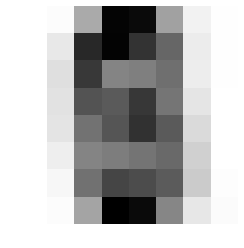

In [3]:
plt.imshow(X_train.mean(axis=0).reshape(img_rows, img_cols), cmap='Greys')
plt.axis('off')
plt.show()

Perhatikan bahwa rata-rata untuk pixels di pojok kiri dan pojok kanan berwarna putih. Artinya, pixels tersebut **tidak pernah berubah warnanya** untuk semua data yang kita miliki. Dengan kata lain, pixels tersebut *tidak berguna* untuk menentukan gambar digit apakah yang akan kita klasifikasi tersebut. PCA bertujuan untuk "membuang" atribut-atribut yang tidak berguna tersebut.

In [4]:
print(X_train.shape)
print(X_test.shape)

(1203, 64)
(594, 64)


In [5]:
pca = PCA(2) # kita akan mengambil dua komponen paling pentingnya saja
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(1203, 2)
(594, 2)


Karena dimensi hasil proyeksi hanya terdiri dari dua atribut, maka kita bisa memetakannya ke dalam diagram cartesian.

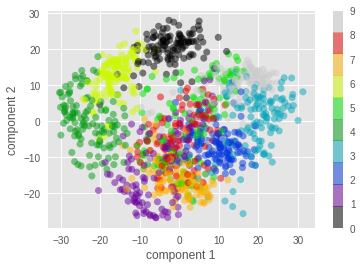

In [7]:
# Kode dari http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Dari *scatter plot* tersebut, kita dapat melihat bahwa angka 1, 4, dan 7 berada berdekatan (lihat bagian bawah kiri). Ini sesuai dengan intuisi kita bahwa angka 1, 4, dan 7 memiliki kemiripan dari sisi tarikan garis lurus. Inilah yang dicoba digambarkan sebagai "komponen prinsipil" dari gambar angka yang kita miliki.

### Menentukan Jumlah Komponen Prinsipil

Dalam mencari jumlah komponen prinsipil, kita ingin mempertahankan sebanyak mungkin variansi dari data yang sebenarnya. Angka yang lumrah digunakan adalah 90% atau 95%. Nilai variansi ini bersesuaian dengan $m$ nilai eigen terbesar pertama.
$$
\frac{\sum_{i=1}^{m} \lambda_i}{\sum_{i=1}^{d} \lambda_i} \le 1
$$
Nilai ini dapat juga dipetakan sebagai total kumulatif nilai eigen yang terurut tersebut sehingga dapat terlihat seperti di bawah ini.

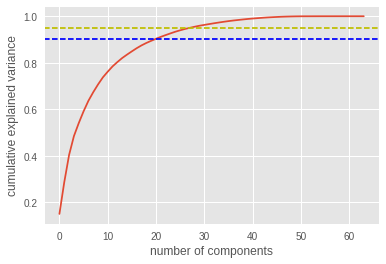

In [8]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(.90, linestyle='--', c='b')
plt.axhline(.95, linestyle='--', c='y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Menggunakan PCA untuk Memperbaiki Klasifikasi

Dalam beberapa algoritma, penggunaan PCA bisa meningkatkan akurasi. Namun, beberapa algoritma yang lain mendapat keuntungan dari klasifikasi berupa proses yang lebih cepat. Dalam modul ini, kita akan melihat dampak PCA pada hasil klasifikasi dengan Naive Bayes dan k-Nearest Neighbours.

1 loop, best of 3: 2.9 ms per loop
Akurasi: 0.833333333333


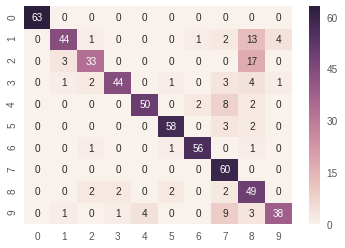

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

clf = GaussianNB()
%timeit -n 1 clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Akurasi:', accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d');

1 loop, best of 3: 18.3 ms per loop
1 loop, best of 3: 2.18 ms per loop
Akurasi: 0.93265993266


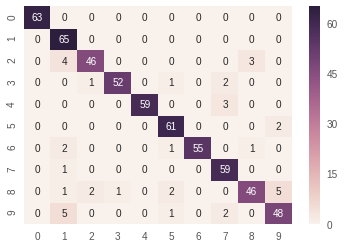

In [10]:
pca = PCA(.9) # PCA dengan komponen yang menjelaskan 90% variansi
%timeit -n 1 pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = GaussianNB()
%timeit -n 1 clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print('Akurasi:', accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d');

Ingat bahwa Naive Bayes memanfaatkan asumsi bahwa setiap atribut *conditionally independent* jika diberikan kelasnya? PCA menghasilkan proyeksi dengan memanfaatkan vektor eigen yang saling tegak lurus satu sama lain sehingga hasil klasifikasi dengan Naive Bayes bisa lebih baik karena sesuai dengan asumsi yang diberikan di awal tersebut.

1 loop, best of 3: 4.05 ms per loop
1 loop, best of 3: 1.94 ms per loop
1 loop, best of 3: 1.93 ms per loop
1 loop, best of 3: 3.89 ms per loop
1 loop, best of 3: 2.35 ms per loop
1 loop, best of 3: 3.19 ms per loop
1 loop, best of 3: 2.34 ms per loop
1 loop, best of 3: 1.94 ms per loop
1 loop, best of 3: 2.19 ms per loop
1 loop, best of 3: 2.2 ms per loop
Akurasi terbaik 0.991582491582


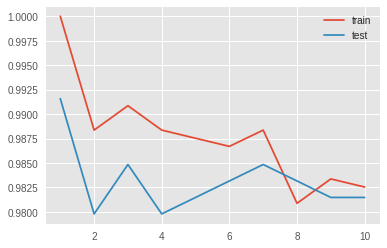

In [11]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
acc = []

for k in range(1, 11):
    clf = KNeighborsClassifier(k)
    %timeit -n 1 clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, y_train_pred))
    acc.append(accuracy_score(y_test, y_pred))
print('Akurasi terbaik', max(acc))
plt.plot(range(1, 11), train_acc)
plt.plot(range(1, 11), acc)
plt.legend(['train', 'test']);

1 loop, best of 3: 11.2 ms per loop
1 loop, best of 3: 1.63 ms per loop
The slowest run took 7.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 1.76 ms per loop
1 loop, best of 3: 1.24 ms per loop
1 loop, best of 3: 1.18 ms per loop
1 loop, best of 3: 1.19 ms per loop
1 loop, best of 3: 966 µs per loop
1 loop, best of 3: 1.02 ms per loop
1 loop, best of 3: 1.79 ms per loop
1 loop, best of 3: 1.74 ms per loop
1 loop, best of 3: 1.16 ms per loop
Akurasi terbaik 0.989898989899


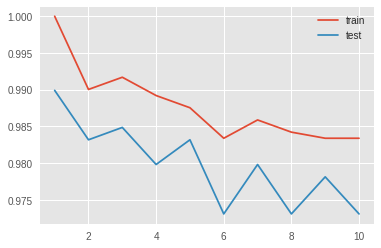

In [12]:
pca = PCA(.9) # PCA dengan komponen yang menjelaskan 90% variansi
%timeit -n 1 pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
train_acc = []
acc = []

for k in range(1, 11):
    clf = KNeighborsClassifier(k)
    %timeit -n 1 clf.fit(X_train_pca, y_train)
    y_train_pred = clf.predict(X_train_pca)
    y_pred = clf.predict(X_test_pca)

    train_acc.append(accuracy_score(y_train, y_train_pred))
    acc.append(accuracy_score(y_test, y_pred))
print('Akurasi terbaik', max(acc))
plt.plot(range(1, 11), train_acc)
plt.plot(range(1, 11), acc)
plt.legend(['train', 'test']);

Perhatikan dalam kasus k-NN bahwa waktu yang dibutuhkan untuk membentuk "model" menjadi lebih cepat. Jika Anda coba untuk dataset yang berukuran lebih besar, Anda akan melihat efek yang lebih drastis pada perubahan kecepatan jika dibandingkan dengan pengorbanan akurasi -- dan terkadang kita membutuhkan ini.